<a href="https://colab.research.google.com/github/Branis333/Water-Quality-Model-peer9/blob/Ian/formative_II_starter_code_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Excercise - Creating our own custom Model

This is a notebook that provides a quick overview of how to create your own custom model. You will be creating a simple model.
You will be utilizing Keras and Tensorflow


## Water Quality Dataset

This dataset contains water quality measurements and assessments related to potability, which is the suitability of water for human consumption. The dataset's primary objective is to provide insights into water quality parameters and assist in determining whether the water is potable or not. Each row in the dataset represents a water sample with specific attributes, and the "Potability" column indicates whether the water is suitable for consumption.

https://www.kaggle.com/datasets/uom190346a/water-quality-and-potability?select=water_potability.csv


In [40]:
!pip install -U scikeras
import pandas as pd
import numpy as np
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from scikeras.wrappers import  KerasClassifier
from matplotlib import pyplot

Plot the Data Appropriately

In [29]:
data = pd.read_csv('/content/water_potability.csv')
# print(data.shape)
filled_data = data.fillna(data.mean(),axis=0)
# data.shape[0] - dropped_rows.shape[0] 1275 rows with N/A values so 38.9% of the dataset
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [30]:
# generate 2d classification dataset
X , Y = filled_data.drop('Potability',axis=1) , data['Potability']
scaler = StandardScaler()
cols_trans = ColumnTransformer(transformers=[('scaler',scaler,X.columns)])
# sx_arr = cols_trans.fit_transform(X)
# X = pd.DataFrame(sx_arr)
# X

In [31]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size=0.3)
val_X_train , val_X_test , val_Y_train , val_Y_test = train_test_split(X_train,Y_train,test_size=0.15)

# Each Memeber Defines their model Here

In [45]:
def model_Ian_Ganza():
  model = tf.keras.models.Sequential([
      tf.keras.layers.Input(shape=(9,)),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(128,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1,activation='sigmoid')
  ])
  adagrad = Adagrad(learning_rate=0.03)
  model.compile(optimizer=adagrad, loss='binary_crossentropy', metrics=['accuracy'])
  return model

krModel = KerasClassifier(build_fn=model_Ian_Ganza,batch_size=128,epochs=10)
pipeline = Pipeline(steps=[('preprocessor',cols_trans),('model',krModel)])
early_stop = EarlyStopping(patience=5,monitor='val_loss',mode='min',restore_best_weights=True)

In [ ]:
#Model Definition by member 2
def model_name_of_student():

  return

In [ ]:
#Model Definition by member 3
def model_name_of_student():

  return

# Start the training Process

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.5565 - loss: 0.6882

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.5569 - loss: 0.6881 - val_accuracy: 0.5926 - val_loss: 874.7811
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.5976 - loss: 0.6846 - val_accuracy: 0.5926 - val_loss: 688.8292
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.5727 - loss: 0.6899 - val_accuracy: 0.5926 - val_loss: 712.8983
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5932 - loss: 0.6816 - val_accuracy: 0.5926 - val_loss: 699.6866
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.5926 - loss: 0.6860 - val_accuracy: 0.5926 - val_loss: 485.8632
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.5928 - loss: 0.6759 - val_accuracy: 0.5926 - val_loss: 537.0059
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.6012 - loss: 0.6753 - val_accuracy: 0.5926 - val_loss: 527.6445
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.6014 - loss: 0.6725 - val_accuracy: 0.592

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Train: 0.604, Test: 0.624


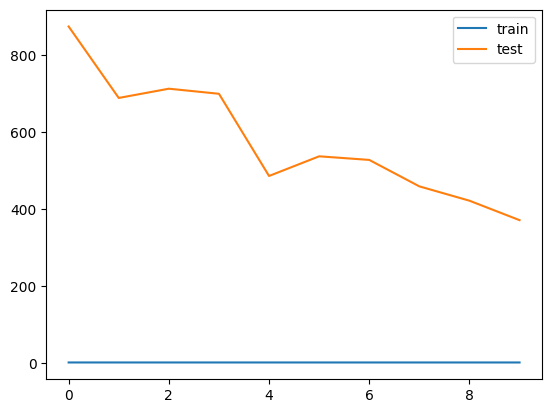

In [50]:
#fit model
# The pipeline.fit method in scikeras returns the fitted pipeline itself, not the history.
# The history is stored within the fitted model inside the pipeline.
pipeline.fit(X_train, Y_train, model__validation_data=(val_X_train, val_Y_train), model__callbacks=[early_stop])

# Access the history from the fitted Keras model inside the pipeline
history = pipeline.named_steps['model'].history_

# evaluate the model
_, train_acc = pipeline.named_steps['model'].model_.evaluate(X_train, Y_train, verbose=0)
_, test_acc = pipeline.named_steps['model'].model_.evaluate(X_test, Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot training history
# Now, access the history data from the history object
# Access 'loss' and 'val_loss' directly from the history dictionary
pyplot.plot(history['loss'], label='train')
pyplot.plot(history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy

In [ ]:
#Data Loading and Preprocessing
# The coach will never do this!!
regularizer = 'l1'

In [ ]:
model = Sequential()
model.add(Dense(32, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(64, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
#adding Dropout
model.add(Dense(128, activation ='relu', kernel_regularizer= regularizer , input_shape = (2224,224)))
model.add(Dropout(0.2))
#adding Dropout
model.add(Dense(2, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
callback =EarlyStopping(monitor='loss',patience=3)

In [ ]:
model.compile(optimizer='adam', loss= 'rmse', metrics = ['accuracy'])

In [ ]:
model.fit(X, Y, epochs=1000, batch_size= 128, callbacks=[callback], verbose=0)

NameError: name 'X' is not defined

In [ ]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 2224, 32)       │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 2224, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 2224, 2)        │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,266 (28.38 KB)

 Trainable params: 7,266 (28.38 KB)

 Non-trainable params: 0 (0.00 B)